# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 2

**Date:** 20FEB2022

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load Dataset

**[1.1]** Task: Import required packages: Pandas, Numpy, joblib

In [1]:
# Task: Import the pandas, numpy and joblib package
import pandas as pd
import numpy as np
import joblib as job

**[1.2]** Task: Change working directory to /home/jovyan/work

In [2]:
cd /home/jovyan/work

/home/jovyan/work


**[1.3]** Task: Load Processed Data

In [3]:
from src.data.sets import load_sets

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='data/processed/', val=False)

## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [6]:
y_mode = y_train.mean()
y_mode

0.83359375

**[3.2]** Task: Create a numpy array called y_base filled with this value

In [7]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [10]:
from src.models.performance import print_reg_perf

**[3.4]** Task: Display the accuracy score of this baseline model

In [11]:
print_reg_perf(y_train, y_base, set_name="Baseline")

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [12]:
len(X_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Random Forest - Hyperparameter Tuning with Grid Search and KFold

Train Random Forest Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [13]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [14]:
# Linear Regression Random Grid Parameters
# Class Weight
class_weight = ['balanced']
# Penalty
penalty = ['none','l2','l1','elasticnet']
# Solver
solver = ['liblinear','lbfgs']
# max_iter
max_iter = [500]

random_grid = {'class_weight': class_weight,
               'penalty':penalty,
               'solver':solver,
               'max_iter':max_iter
               }



In [ ]:
random_grid

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [15]:
 from sklearn.linear_model import LogisticRegression as LR

In [16]:
lr_base = LR()
lr_random = RandomizedSearchCV(estimator = lr_base,
                               param_distributions = random_grid,
                               n_iter = 50, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [17]:
# Import Beep
from src.indicator.sounds import beep_when_done

In [18]:
lr_random.fit(X_train, y_train)

# Beep when completed
#beep_when_done()

print(lr_random.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", lin

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 500, 'class_weight': 'balanced'}


"print(lr_random.best_params_)"

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}

In [19]:
lr_best = LR(solver='lbfgs', penalty='l2', max_iter=500, class_weight='balanced').fit(X_train, y_train)

In [21]:
print("--- Accuracy Scores Best Fit Model ---")
#print_reg_perf(y_train, y_base,                   set_name="Baseline")
print_reg_perf(lr_best.predict(X_train), y_train, set_name="Train   ")
print_reg_perf(lr_best.predict(X_val), y_val,     set_name="Validate")

--- Accuracy Scores Best Fit Model ---
Accuracy      Train   : 0.6465625
RMSE          Train   : 0.5945060975297057
MAE           Train   : 0.3534375
Precision     Train   : 0.902330452998167
Recall        Train   : 0.6459231490159325
F1            Train   : 0.752894909329255
Accuracy      Validate: 0.645625
RMSE          Validate: 0.5952940449895329
MAE           Validate: 0.354375
Precision     Validate: 0.9024134312696747
Recall        Validate: 0.6446776611694153
F1            Validate: 0.7520769567118496


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to and 
2. increase min samples per leaf to 10

In [22]:
lr_best_1 = LR(solver='lbfgs', penalty='none', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [24]:
print("--- Accuracy Scores Best Fit Model ---")
#print_reg_perf(y_train, y_base,                     set_name="Baseline")
print_reg_perf(lr_best_1.predict(X_train), y_train, set_name="Train   ")
print_reg_perf(lr_best_1.predict(X_val), y_val,     set_name="Validate")

--- Accuracy Scores Best Fit Model ---
Accuracy      Train   : 0.64875
RMSE          Train   : 0.5926634795564849
MAE           Train   : 0.35125
Precision     Train   : 0.9018484769591252
Recall        Train   : 0.6492970946579194
F1            Train   : 0.7550130775937227
Accuracy      Validate: 0.64375
RMSE          Validate: 0.5968668193156661
MAE           Validate: 0.35625
Precision     Validate: 0.9012605042016807
Recall        Validate: 0.6431784107946027
F1            Validate: 0.7506561679790026


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


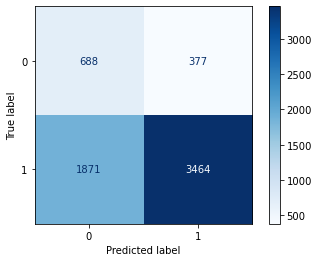

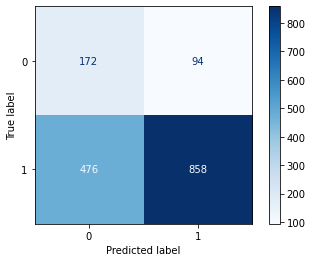

In [26]:
# Plot confusion matrix (with numbers)
plot_confusion_matrix(lr_best_1, X_train, y_train, cmap=plt.cm.Blues)
plot_confusion_matrix(lr_best_1, X_val, y_val, cmap=plt.cm.Blues)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


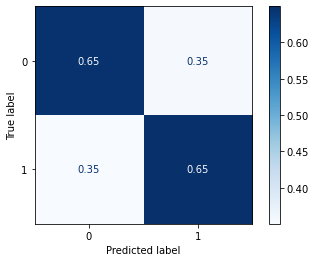

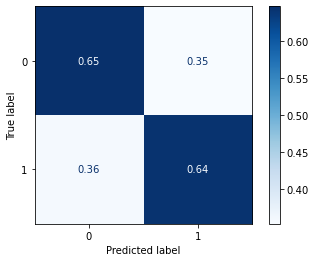

In [27]:
# Plot confusion matrix (with ratios)
plot_confusion_matrix(lr_best_1, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plot_confusion_matrix(lr_best_1, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
lr_best_1_y_train_proba = lr_best_1.predict_proba(X_train)[:, 1]
lr_best_1_y_val_proba = lr_best_1.predict_proba(X_val)[:, 1]
print("rf_best_1_proba:", lr_best_1_y_train_proba)

rf_best_1_proba: [0.52853165 0.09868567 0.65606225 ... 0.49932972 0.48172526 0.76725576]


In [31]:
roc_auc_score(y_train, lr_best_1_y_train_proba)

0.7108023460978303

In [32]:
roc_auc_score(y_val, lr_best_1_y_val_proba)

0.698946579341908

**Observations** 
* Training Dataset has a AUROC prediction 0.711
* Validation Dataset has a poor AUROC prediction 0.698. This indicates the model is fitting reasonably well on unseen data
* The finaly Kaggle result AUROC 0.71246 - Best Personal Result (to-date)

## 5. Plot AUC

In [33]:
from sklearn.metrics import roc_curve

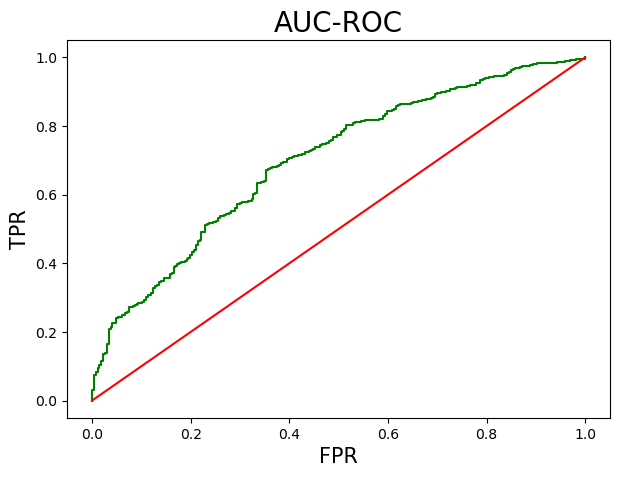

0.698946579341908

In [34]:
fpr,tpr,threshold=roc_curve(y_val,lr_best_1_y_val_proba)
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_val,lr_best_1_y_val_proba)

## 6. Logistic Regression - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using rf_best Random Forest Model

In [35]:
# File URLs
file_path_test= "data/processed/test.csv"

# Load files into df_training and df_validation data frames
df_test = pd.read_csv(file_path_test)

In [36]:

# Drop Target and ID for X, and create target from y
X_test_id = df_test['Id']
X_test = df_test.drop(['Id'], axis=1)

**[6.2]** Check Test Dataset is ready for predicting

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GP               3799 non-null   float64
 1   MIN              3799 non-null   float64
 2   PTS              3799 non-null   float64
 3   FGM              3799 non-null   float64
 4   FGA              3799 non-null   float64
 5   FG%              3799 non-null   float64
 6   3P Made          3799 non-null   float64
 7   3PA              3799 non-null   float64
 8   3P%              3799 non-null   float64
 9   FTM              3799 non-null   float64
 10  FTA              3799 non-null   float64
 11  FT%              3799 non-null   float64
 12  OREB             3799 non-null   float64
 13  DREB             3799 non-null   float64
 14  REB              3799 non-null   float64
 15  AST              3799 non-null   float64
 16  STL              3799 non-null   float64
 17  BLK           

**[6.3]** Create y Prediction using the Test Dataset

In [38]:
y_predict = lr_best_1.predict_proba(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [39]:
print(y_predict)

[[0.60204656 0.39795344]
 [0.6727464  0.3272536 ]
 [0.32128402 0.67871598]
 ...
 [0.67946398 0.32053602]
 [0.21318982 0.78681018]
 [0.68288775 0.31711225]]


In [40]:
print(y_predict[:,1])

[0.39795344 0.3272536  0.67871598 ... 0.32053602 0.78681018 0.31711225]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [41]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(y_predict[:,1], columns = ['TARGET_5Yrs'])

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [42]:
y_predict = pd.concat([X_test_id, y_predict], axis=1)

In [43]:
y_predict = y_predict.sort_values(by=['Id'])

In [ ]:
print(y_predict)

**[6.6]** Export Dataframe to CSV and save model

In [44]:
y_predict.to_csv("data/external/submission_nfragar_20220224_linear_regression_w3_1_add_kmeans_feature.csv", index = False)
y_predict.shape

(3799, 2)

[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=lbfgs; total time=   0.4s
[CV] END class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END class_weight=balanced, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs